# Active Brownian Particles


In [1]:
# Install dependencies
# Substitute pip3.9 with your version
!pip3.9 install matplotlib numpy pybind11

# Compile the module abp
!make


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
g++ -O3 -Wall -shared -std=c++11 -undefined dynamic_lookup  $(python3.9 -m pybind11 --includes) functions.cpp pybind.cpp -o abp$(python3.9-config --extension-suffix)


In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import math
from abp import ABP_2d, point, region

## Stochastic Dynamics

In [3]:
# Define trail parameters
dt = 0.00001
D_r = 1.0
k = 1.0
L = 1.0
mu = 1.0
w = 0.0

# Numbers
pe = 0.0
l_star = 1.0

# Other parameters
v_max = 8*math.pi*k*mu/L
v = pe*v_max
D_theta = pe*v_max*v_max/(D_r*l_star)

# Define reactant and target region
reactant = region(x=-L/16,y=-L/16,radius=L/40.0)
target = region(x=L/16,y=L/16,radius=L/40.0)
    
# Define the active brownian particle
particle = ABP_2d(reactant,target, num_steps = 10**7, dt=1e-5, v=pe*v_max, D_r=D_r, D_theta=D_theta, k=k, L=L, mu=mu, w=w)
particle.dynamics()




Total time to perform dynamics: 1.03634 s


In [4]:
# Convert data in numpy array (exclude last positions and angles)
x_dyn= np.array(particle.position_x)
y_dyn = np.array(particle.position_y)
theta = np.array(particle.theta)
bool_reactant = np.array(particle.bool_reactant)
bool_target = np.array(particle.bool_target)
reactive_path = np.array(particle.reactive_path)


# Apply mask to select only reactive paths
x_dyn = x_dyn[reactive_path]
y_dyn = y_dyn[reactive_path]


## Potential plot

In [ ]:
### Contour plot of potential
# Define potential function
def potential(x, y):
    return k*(np.sin(8*math.pi*(x +3./16.*L)/L) + np.sin(8*math.pi*(y+3./16.*L)/L))

# Mesh grid
x = np.linspace(-L/8, L/8, 1000)
y = np.linspace(-L/8, L/8, 1000)
xx, yy = np.meshgrid(x, y)

# Potential
zz = potential(xx,yy)

# Plot
cf = plt.contourf(xx,yy, zz, cmap ="RdBu")
plt.colorbar()

# Rendering
plt.title("Potential")
plt.xlabel("x")
plt.ylabel("y")
x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
#plt.legend()
plt.tight_layout()
plt.savefig("potential.png")

## Transition probability density

Total time to perform dynamics: 0.968938 s
Total time to perform dynamics: 0.953919 s
Total time to perform dynamics: 0.968498 s
Total time to perform dynamics: 0.970328 s
Total time to perform dynamics: 1.00893 s
Total time to perform dynamics: 1.04966 s
Total time to perform dynamics: 0.966332 s
Total time to perform dynamics: 1.0472 s
Total time to perform dynamics: 1.09474 s


<IPython.core.display.Javascript object>


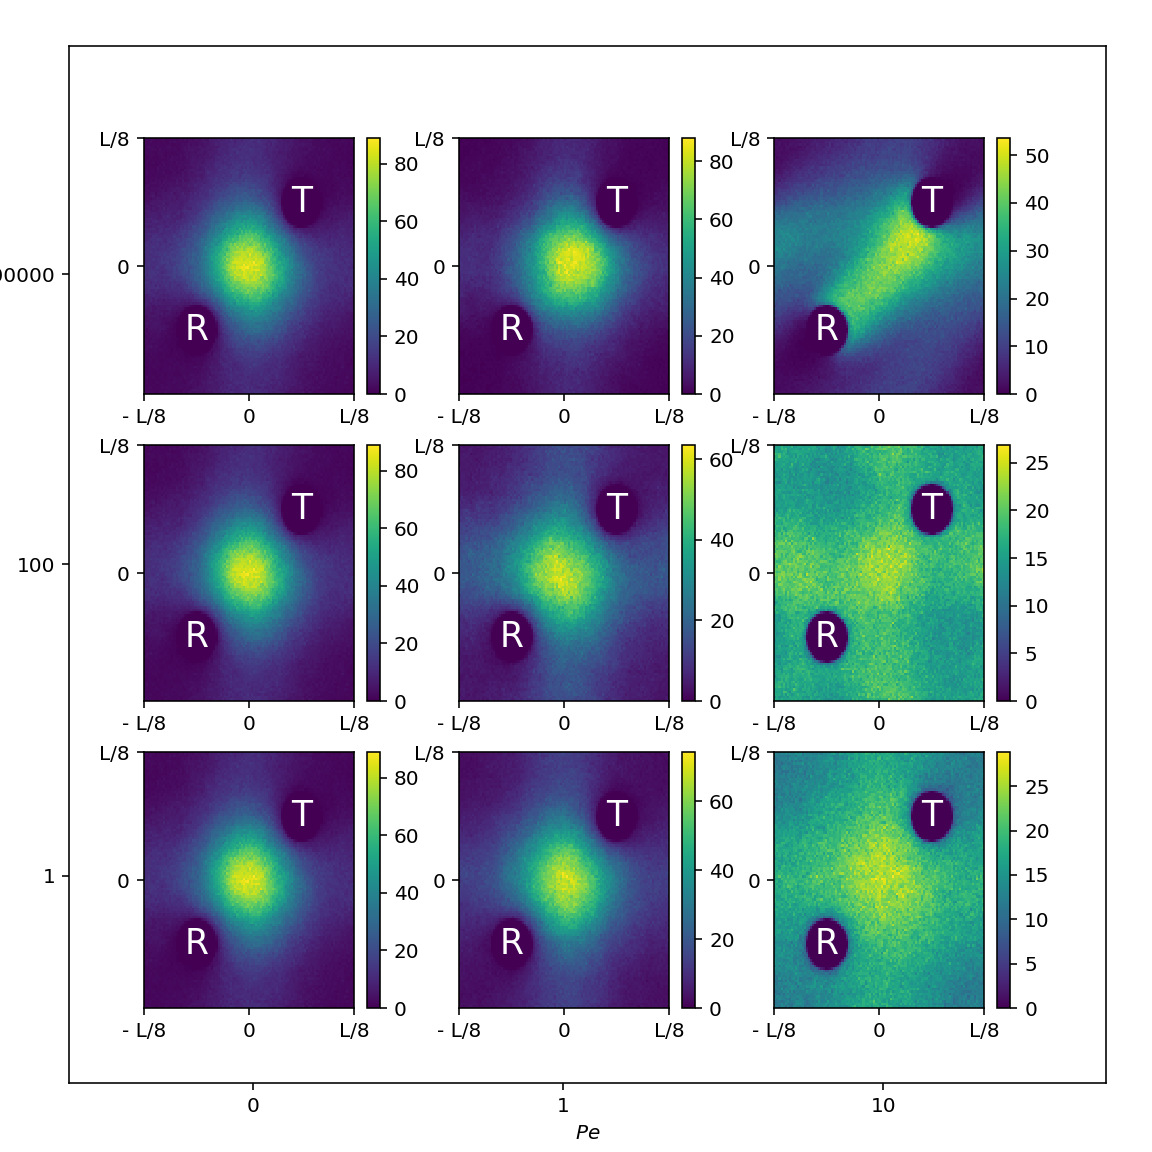

In [85]:
# Plot Mnist

pe_vec = [0,1,10]
lstar_vec = [10**8,10**2,10**0]


fig =  plt.figure(figsize=(8, 8))
sax = fig.add_axes([0.06, 0.06, 0.9, 0.9])
#sax.set_autoscale_on(True)


# hide tick and tick label of the big axes
s_xticks = [0.177, 0.4767, 0.7853]
s_yticks = [0.78, 0.5, 0.2]
sax.set_xticks(s_xticks, pe_vec)
sax.set_yticks(s_yticks, lstar_vec)
sax.grid(False)
sax.set_xlabel("$Pe$")
sax.set_ylabel("$l^*$")


x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]


# Define reactant and target region
reactant = region(x=-L/16,y=-L/16,radius=L/40.0)
target = region(x=L/16,y=L/16,radius=L/40.0)

for i in range(3):
    for j in range(3):
        n = i*3+j
        ax = fig.add_subplot(3,3,n+1)
        # Define parameters
        pe = pe_vec[j]
        l_star = lstar_vec[i]
        v = pe*v_max
        D_theta = pe*v_max*v_max/(D_r*l_star)
        # Compute statistics
        particle = ABP_2d(reactant,target, num_steps = 10**7, dt=1e-5, v=pe*v_max, D_r=D_r, D_theta=D_theta, k=k, L=L, mu=mu, w=w)
        particle.dynamics()
        # Retireve data
        x_dyn= np.array(particle.position_x)
        y_dyn = np.array(particle.position_y)
        reactive_path = np.array(particle.reactive_path)
        x_dyn = x_dyn[reactive_path]
        y_dyn = y_dyn[reactive_path]
        #Plot
        h = ax.hist2d(x_dyn, y_dyn, bins = 100, density = True)
        ax.text(reactant.x, reactant.y, "R", c = "white", size ="xx-large", ha = "center" , va="center")
        ax.text(target.x, target.y, "T",c = "white", size ="xx-large" , ha = "center", va="center")
        ax.set_xticks(x_ticks, x_labels)
        ax.set_yticks(y_ticks, y_labels)
        fig.colorbar(h[3], ax=ax)


        
#fig.tight_layout(pad=0.2)
fig.savefig("prob_density.png")
fig.show()


## Transition times

In [ ]:
# Reactive times
def calculate_reactive_times(reactive_path):
    reactive_times = reactive_path
    reactive_times[reactive_times==True] = 1
    reactive_times[reactive_times==False] = 0
    reactive_times = np.where(reactive_times==1)[0]
    reactive_times = np.array([reactive_times[i]-reactive_times[i-1]-1 for i in range(1,len(reactive_times)) ])
    reactive_times = reactive_times[reactive_times!=0]
    reactive_times = reactive_times*dt
    return np.mean(reactive_times), np.std(reactive_times)



mean, std = calculate_reactive_times(reactive_path)

print(mean, std)
